<a href="https://colab.research.google.com/github/gtafuri/IntroCompNumerica/blob/main/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final de Introdução à Computação Numérica 2025.1
Feito por Giulia Tafuri E Nikolas de Azevedo

Enunciado:

> 1) Implemente o método de Euler e aplique em dois PVIs. Exiba o gráfico com as curvas t x y(t) e t x y_n. Exiba os erros absoluto e relativo em cada ponto t_n. Se quiserem, exibam os gráficos dos erros.

> 2) Faça o mesmo do item 1 para o Metodo de Euler Melhorado (também chamado de RK2).

> 3) a) Leia o matrerial que está no arquivo presa_predador.pdf; b) implemente o Método de Euler para sistemas de EDO; c) use seu código para resolver um dos exemplos dado no texto; d) busque na internet dados de algum problema real modelado pelo sistema presa-predador e use seu código para resolvê-lo.



# Implementando Metódo de Euler para 2 PVIs
* PVI 1: y′ = y, y(0) = 1 → Solução exata: y(t) = e^t

* PVI 2: y′ = cos(t), y(0) = 0 → Solução exata: y(t) = y'(t) = -y(t) + t^2 + 1, y(0) = 2 → Solução exata: y(t) = t^2 + 3 - 2t -1/(e^t)

In [ ]:
#Importando todas as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm


=== 1. y' = y ===

--- h = 0.1 ---
t=0.00, y_euler=1.00000, y_exact=1.00000, abs_error=0.00000, rel_error=0.00%
t=0.10, y_euler=1.10000, y_exact=1.10517, abs_error=0.00517, rel_error=0.47%
t=0.20, y_euler=1.21000, y_exact=1.22140, abs_error=0.01140, rel_error=0.93%
t=0.30, y_euler=1.33100, y_exact=1.34986, abs_error=0.01886, rel_error=1.40%
t=0.40, y_euler=1.46410, y_exact=1.49182, abs_error=0.02772, rel_error=1.86%
t=0.50, y_euler=1.61051, y_exact=1.64872, abs_error=0.03821, rel_error=2.32%
t=0.60, y_euler=1.77156, y_exact=1.82212, abs_error=0.05056, rel_error=2.77%
t=0.70, y_euler=1.94872, y_exact=2.01375, abs_error=0.06504, rel_error=3.23%
t=0.80, y_euler=2.14359, y_exact=2.22554, abs_error=0.08195, rel_error=3.68%
t=0.90, y_euler=2.35795, y_exact=2.45960, abs_error=0.10166, rel_error=4.13%
t=1.00, y_euler=2.59374, y_exact=2.71828, abs_error=0.12454, rel_error=4.58%
t=1.10, y_euler=2.85312, y_exact=3.00417, abs_error=0.15105, rel_error=5.03%
t=1.20, y_euler=3.13843, y_exact=3.32012

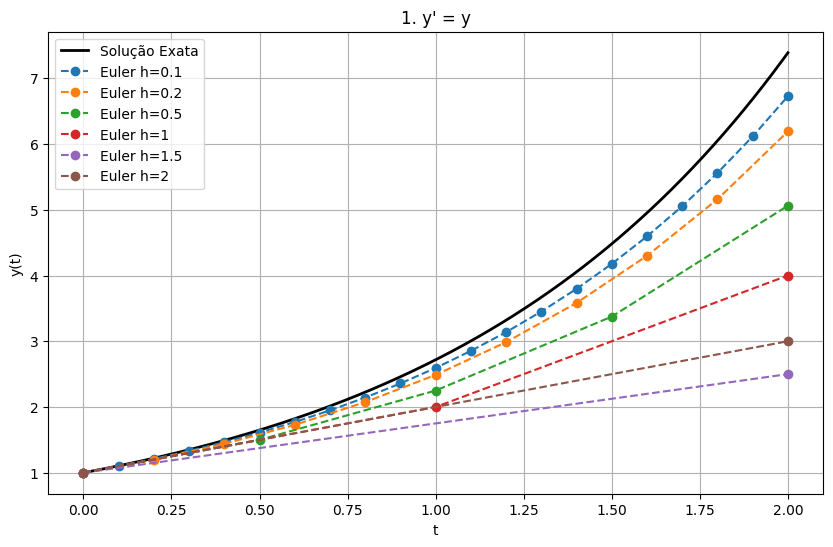

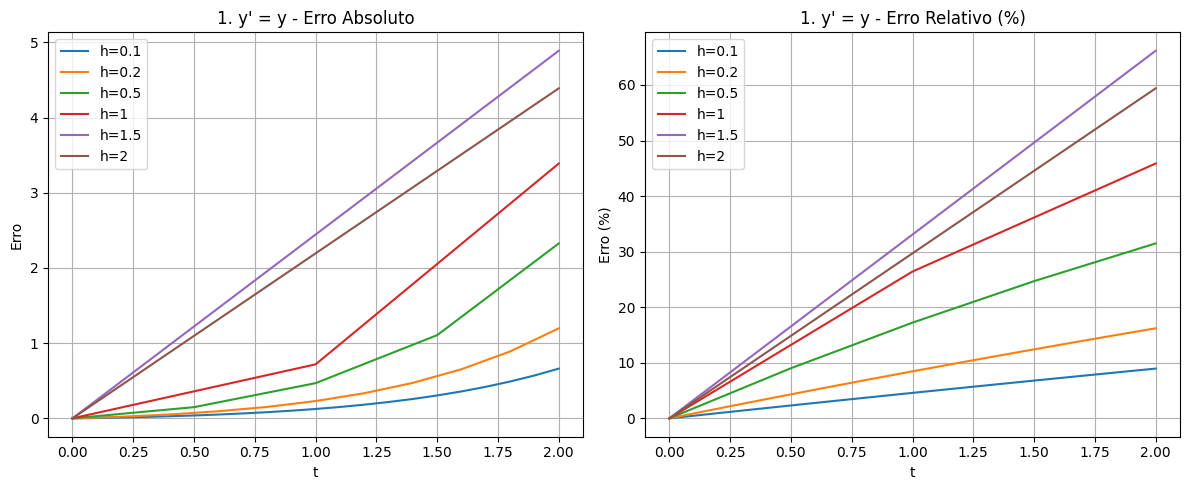


=== 2. y' = -y + t² + 1 ===

--- h = 0.1 ---
t=0.00, y_euler=2.00000, y_exact=2.00000, abs_error=0.00000, rel_error=0.00%
t=0.10, y_euler=1.90000, y_exact=1.90516, abs_error=0.00516, rel_error=0.27%
t=0.20, y_euler=1.81100, y_exact=1.82127, abs_error=0.01027, rel_error=0.56%
t=0.30, y_euler=1.73390, y_exact=1.74918, abs_error=0.01528, rel_error=0.87%
t=0.40, y_euler=1.66951, y_exact=1.68968, abs_error=0.02017, rel_error=1.19%
t=0.50, y_euler=1.61856, y_exact=1.64347, abs_error=0.02491, rel_error=1.52%
t=0.60, y_euler=1.58170, y_exact=1.61119, abs_error=0.02949, rel_error=1.83%
t=0.70, y_euler=1.55953, y_exact=1.59341, abs_error=0.03388, rel_error=2.13%
t=0.80, y_euler=1.55258, y_exact=1.59067, abs_error=0.03809, rel_error=2.39%
t=0.90, y_euler=1.56132, y_exact=1.60343, abs_error=0.04211, rel_error=2.63%
t=1.00, y_euler=1.58619, y_exact=1.63212, abs_error=0.04593, rel_error=2.81%
t=1.10, y_euler=1.62757, y_exact=1.67713, abs_error=0.04956, rel_error=2.95%
t=1.20, y_euler=1.68581, y_exa

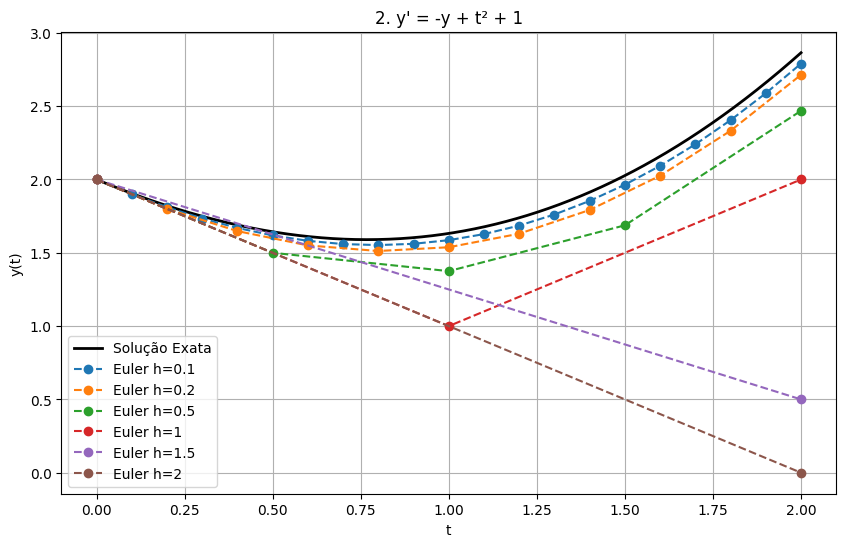

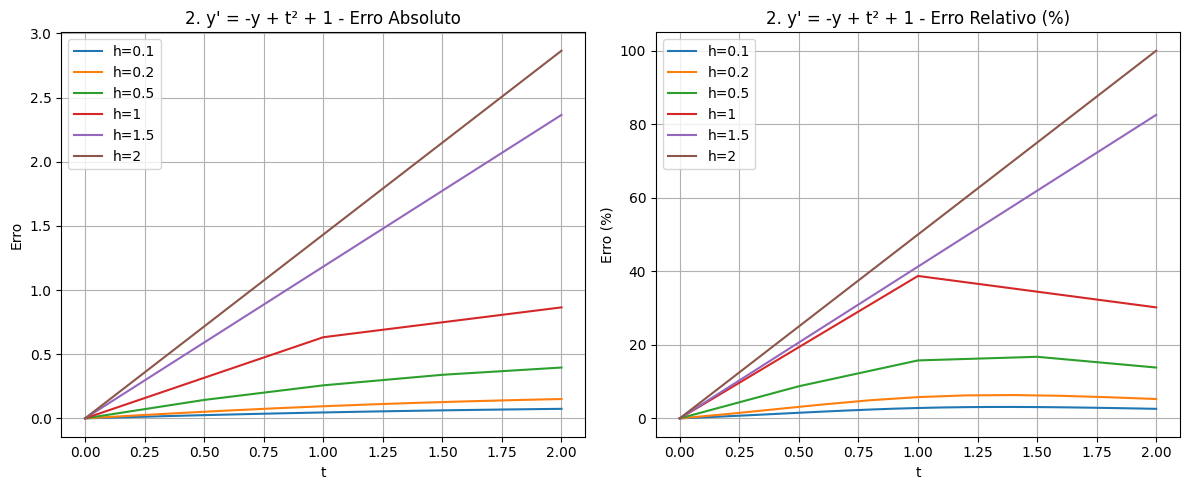

In [ ]:
# Definindo Euler Simples
def euler(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = np.linspace(t0, tf, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0
    for i in range(n):
        y[i + 1] = y[i] + h * f(t[i], y[i])
    return t, y

# Cálculo de erros
def erros(y_exact, y_approx):
    abs_error = np.abs(y_exact - y_approx)
    rel_error = np.abs(abs_error / y_exact)
    return abs_error, rel_error

# Plotando gráficos de solução
def plot_solution(t_exact, y_exact, results, title):
    plt.figure(figsize=(10, 6))
    plt.plot(t_exact, y_exact, label="Solução Exata", color='black', linewidth=2)
    for (t, y, h) in results:
        plt.plot(t, y, marker='o', linestyle='--', label=f"Euler h={h}")
    plt.title(title)
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Gráficos de erro
def plot_erros(todos_t, todos_abs, todos_rel, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for t, erro_abs, h in zip(todos_t, todos_abs, hs):
        plt.plot(t, erro_abs, label=f"h={h}")
    plt.title(f"{title} - Erro Absoluto")
    plt.xlabel("t"); plt.ylabel("Erro"); plt.grid(); plt.legend()

    plt.subplot(1, 2, 2)
    for t, erro_rel, h in zip(todos_t, todos_rel, hs):
        plt.plot(t, erro_rel * 100, label=f"h={h}")
    plt.title(f"{title} - Erro Relativo (%)")
    plt.xlabel("t"); plt.ylabel("Erro (%)"); plt.grid(); plt.legend()

    plt.tight_layout()
    plt.show()

# PVIs e soluções exatas
f1 = lambda t, y: y
y_exact1 = lambda t: np.exp(t)

f2 = lambda t, y: -y + t**2 + 1
y_exact2 = lambda t: t**2 + 3 - 2*t - 1/np.exp(t)

cases = [
    ("1. y' = y", f1, 1, 0, 2, y_exact1),
    ("2. y' = -y + t² + 1", f2, 2, 0, 2, y_exact2)
]

# Valores de h (usamos vários assim como nos exercícios de aula para fins comparativos)
hs = [0.1, 0.2, 0.5, 1, 1.5, 2]

# Processa cada caso
for title, f, y0, t0, tf, y_exact_func in cases:
    t_exact = np.linspace(t0, tf, 1000)
    y_exact_vals = y_exact_func(t_exact)
    results = []

    # Para gráficos de erro
    todos_t = []
    todos_abs = []
    todos_rel = []

    print(f"\n=== {title} ===")
    for h in hs:
        t, y = euler(f, y0, t0, tf, h)
        y_exact_at_t = y_exact_func(t)
        abs_error, rel_error = erros(y_exact_at_t, y)
        results.append((t, y, h))

        # Coletar erros
        todos_t.append(t)
        todos_abs.append(abs_error)
        todos_rel.append(rel_error)

        print(f"\n--- h = {h} ---")
        for i in range(len(t)):
            print(f"t={t[i]:.2f}, y_euler={y[i]:.5f}, y_exact={y_exact_at_t[i]:.5f}, "
                  f"abs_error={abs_error[i]:.5f}, rel_error={rel_error[i]*100:.2f}%")

    # Gráfico da solução
    plot_solution(t_exact, y_exact_vals, results, title)

    # Gráficos dos erros
    plot_erros(todos_t, todos_abs, todos_rel, title)

# **RK2: Euler Melhorado**
* aplicado aos mesmos PVIs analisados acima


=== 1. y' = y ===

--- h = 0.1 ---
t=0.00, y_RK2=1.00000, y_exact=1.00000, abs_error=0.00000, rel_error=0.00%
t=0.10, y_RK2=1.10500, y_exact=1.10517, abs_error=0.00017, rel_error=0.02%
t=0.20, y_RK2=1.22103, y_exact=1.22140, abs_error=0.00038, rel_error=0.03%
t=0.30, y_RK2=1.34923, y_exact=1.34986, abs_error=0.00063, rel_error=0.05%
t=0.40, y_RK2=1.49090, y_exact=1.49182, abs_error=0.00092, rel_error=0.06%
t=0.50, y_RK2=1.64745, y_exact=1.64872, abs_error=0.00127, rel_error=0.08%
t=0.60, y_RK2=1.82043, y_exact=1.82212, abs_error=0.00169, rel_error=0.09%
t=0.70, y_RK2=2.01157, y_exact=2.01375, abs_error=0.00218, rel_error=0.11%
t=0.80, y_RK2=2.22279, y_exact=2.22554, abs_error=0.00275, rel_error=0.12%
t=0.90, y_RK2=2.45618, y_exact=2.45960, abs_error=0.00342, rel_error=0.14%
t=1.00, y_RK2=2.71408, y_exact=2.71828, abs_error=0.00420, rel_error=0.15%
t=1.10, y_RK2=2.99906, y_exact=3.00417, abs_error=0.00511, rel_error=0.17%
t=1.20, y_RK2=3.31396, y_exact=3.32012, abs_error=0.00616, rel_e

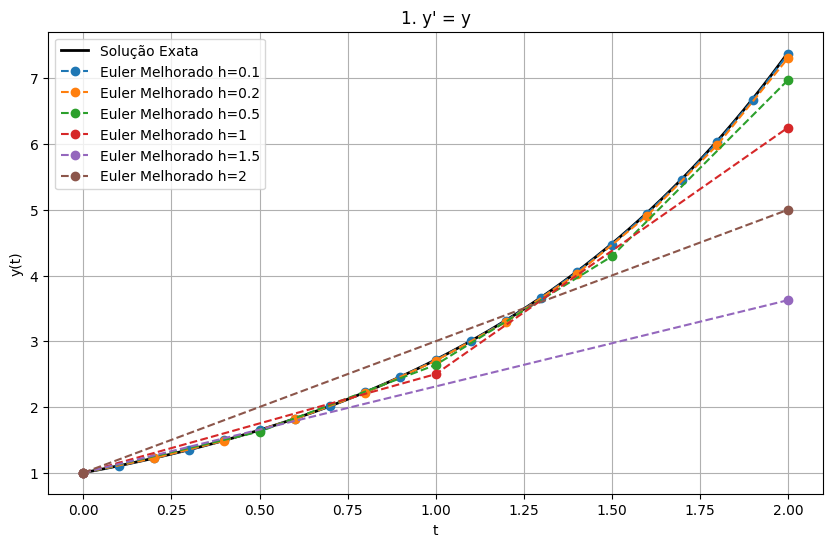

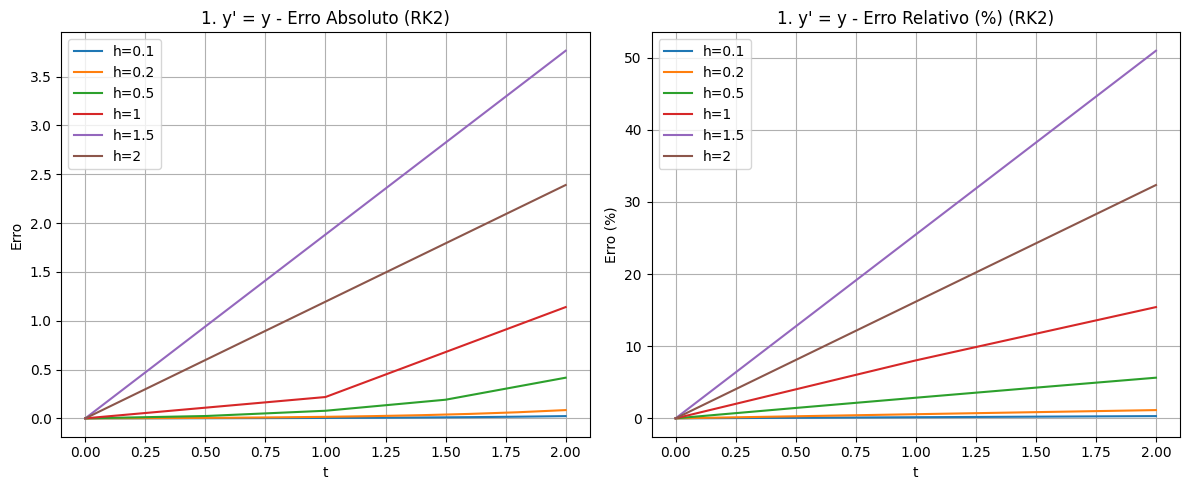


=== 2. y' = -y + t² + 1 ===

--- h = 0.1 ---
t=0.00, y_RK2=2.00000, y_exact=2.00000, abs_error=0.00000, rel_error=0.00%
t=0.10, y_RK2=1.90550, y_exact=1.90516, abs_error=0.00034, rel_error=0.02%
t=0.20, y_RK2=1.82193, y_exact=1.82127, abs_error=0.00066, rel_error=0.04%
t=0.30, y_RK2=1.75014, y_exact=1.74918, abs_error=0.00096, rel_error=0.06%
t=0.40, y_RK2=1.69093, y_exact=1.68968, abs_error=0.00125, rel_error=0.07%
t=0.50, y_RK2=1.64499, y_exact=1.64347, abs_error=0.00152, rel_error=0.09%
t=0.60, y_RK2=1.61297, y_exact=1.61119, abs_error=0.00178, rel_error=0.11%
t=0.70, y_RK2=1.59544, y_exact=1.59341, abs_error=0.00202, rel_error=0.13%
t=0.80, y_RK2=1.59292, y_exact=1.59067, abs_error=0.00225, rel_error=0.14%
t=0.90, y_RK2=1.60589, y_exact=1.60343, abs_error=0.00246, rel_error=0.15%
t=1.00, y_RK2=1.63478, y_exact=1.63212, abs_error=0.00266, rel_error=0.16%
t=1.10, y_RK2=1.67998, y_exact=1.67713, abs_error=0.00285, rel_error=0.17%
t=1.20, y_RK2=1.74183, y_exact=1.73881, abs_error=0.00

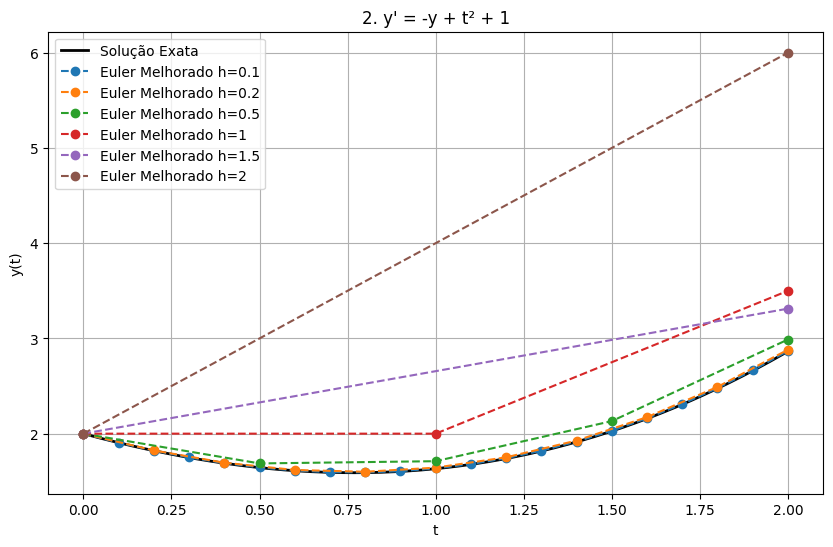

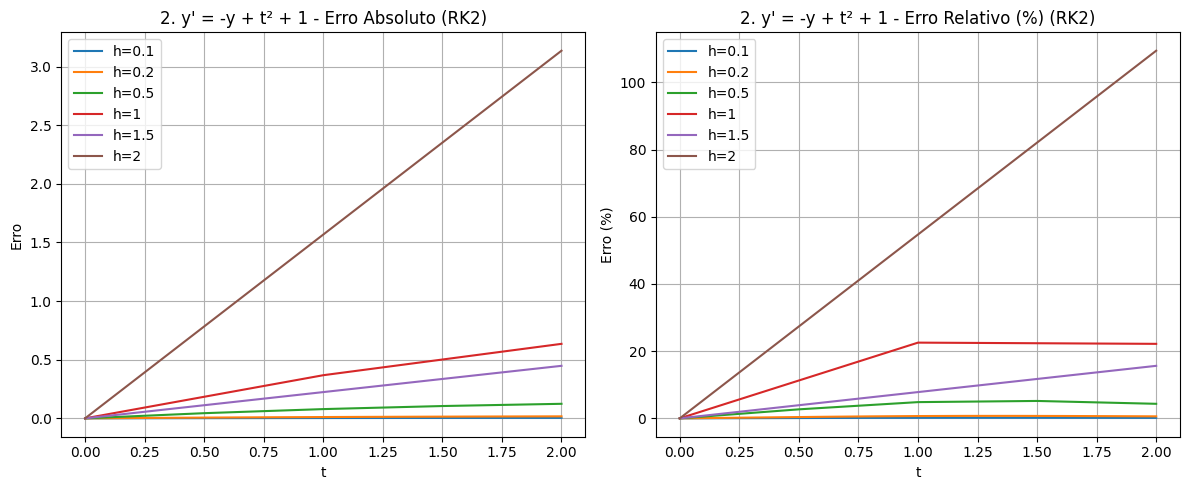

In [ ]:
# Método de Euler Melhorado
def euler_melhorado(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = np.linspace(t0, tf, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0
    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h, y[i] + h * k1)
        y[i + 1] = y[i] + (h / 2) * (k1 + k2)
    return t, y

# Cálculo de erros
def erros(y_exact, y_approx):
    abs_error = np.abs(y_exact - y_approx)
    rel_error = np.abs(abs_error / y_exact)
    return abs_error, rel_error

# Gráfico da solução
def plot_solution(t_exact, y_exact, results, title):
    plt.figure(figsize=(10, 6))
    plt.plot(t_exact, y_exact, label="Solução Exata", color='black', linewidth=2)
    for (t, y, h) in results:
        plt.plot(t, y, marker='o', linestyle='--', label=f"Euler Melhorado h={h}")
    plt.title(title)
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Gráficos de erro absoluto e relativo
def plot_erros(todos_t, todos_abs, todos_rel, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for t, erro_abs, h in zip(todos_t, todos_abs, hs):
        plt.plot(t, erro_abs, label=f"h={h}")
    plt.title(f"{title} - Erro Absoluto (RK2)")
    plt.xlabel("t"); plt.ylabel("Erro"); plt.grid(); plt.legend()

    plt.subplot(1, 2, 2)
    for t, erro_rel, h in zip(todos_t, todos_rel, hs):
        plt.plot(t, erro_rel * 100, label=f"h={h}")
    plt.title(f"{title} - Erro Relativo (%) (RK2)")
    plt.xlabel("t"); plt.ylabel("Erro (%)"); plt.grid(); plt.legend()

    plt.tight_layout()
    plt.show()

# PVIs e soluções exatas
f1 = lambda t, y: y
y_exact1 = lambda t: np.exp(t)

f2 = lambda t, y: -y + t**2 + 1
y_exact2 = lambda t: t**2 + 3 - 2*t - 1/np.exp(t)

# Lista de problemas
cases = [
    ("1. y' = y", f1, 1, 0, 2, y_exact1),
    ("2. y' = -y + t² + 1", f2, 2, 0, 2, y_exact2)
]

# Valores de h
hs = [0.1, 0.2, 0.5, 1, 1.5, 2]

# Processa cada caso
for title, f, y0, t0, tf, y_exact_func in cases:
    t_exact = np.linspace(t0, tf, 1000)
    y_exact_vals = y_exact_func(t_exact)
    results = []

    # Para gráficos de erro
    todos_t = []
    todos_abs = []
    todos_rel = []

    print(f"\n=== {title} ===")
    for h in hs:
        t, y = euler_melhorado(f, y0, t0, tf, h)
        y_exact_at_t = y_exact_func(t)
        abs_error, rel_error = erros(y_exact_at_t, y)
        results.append((t, y, h))

        # Coletar erros
        todos_t.append(t)
        todos_abs.append(abs_error)
        todos_rel.append(rel_error)

        print(f"\n--- h = {h} ---")
        for i in range(len(t)):
            print(f"t={t[i]:.2f}, y_RK2={y[i]:.5f}, y_exact={y_exact_at_t[i]:.5f}, "
                  f"abs_error={abs_error[i]:.5f}, rel_error={rel_error[i]*100:.2f}%")

    # Gráfico da solução
    plot_solution(t_exact, y_exact_vals, results, title)

    # Gráficos dos erros
    plot_erros(todos_t, todos_abs, todos_rel, title)


# Extra: Comparativo entre Euler simples e melhorado


*   Decidimos implementar o comparativo entre os metodos assim como foi feito em sala de aula


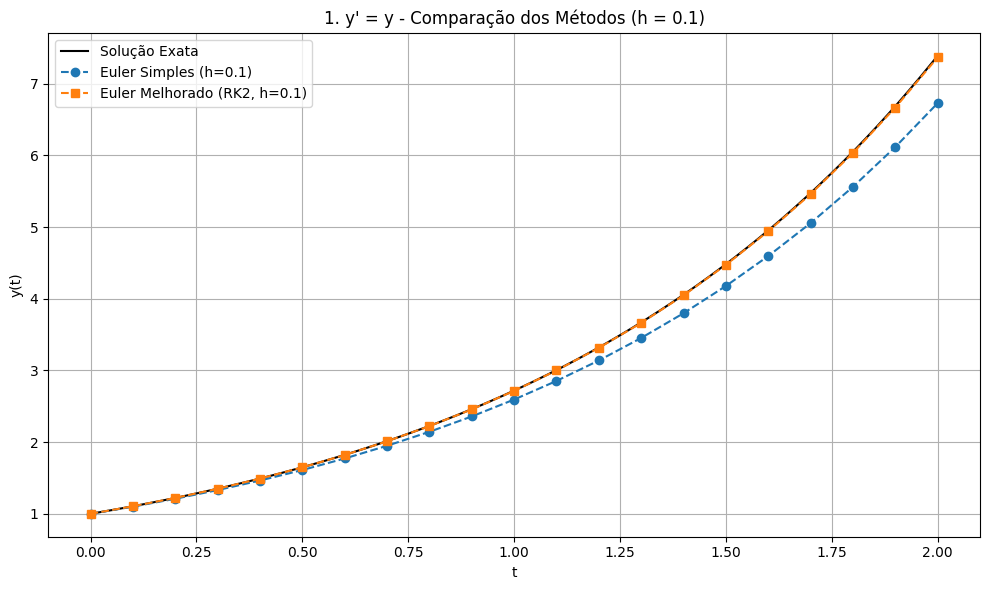

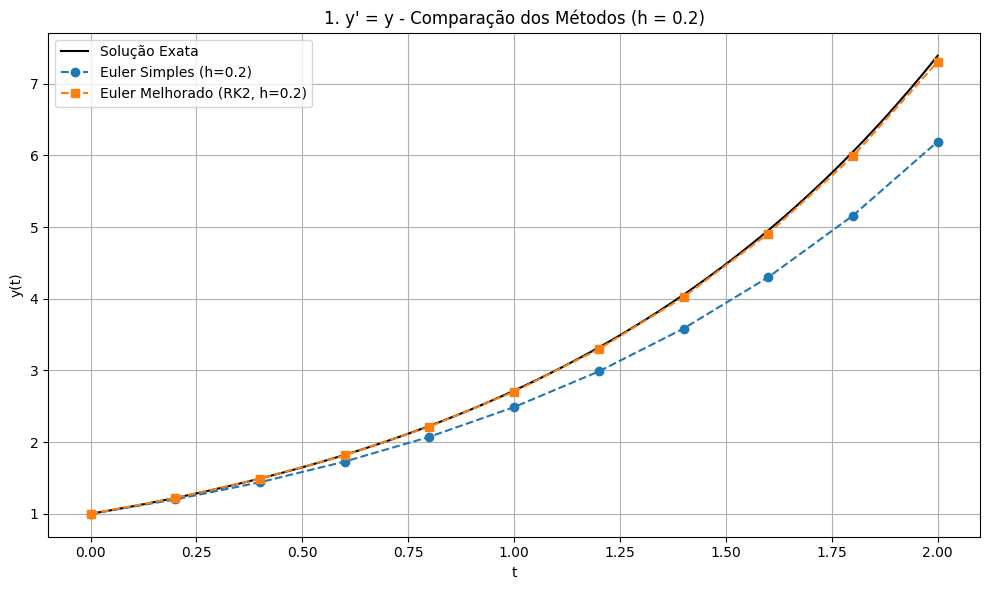

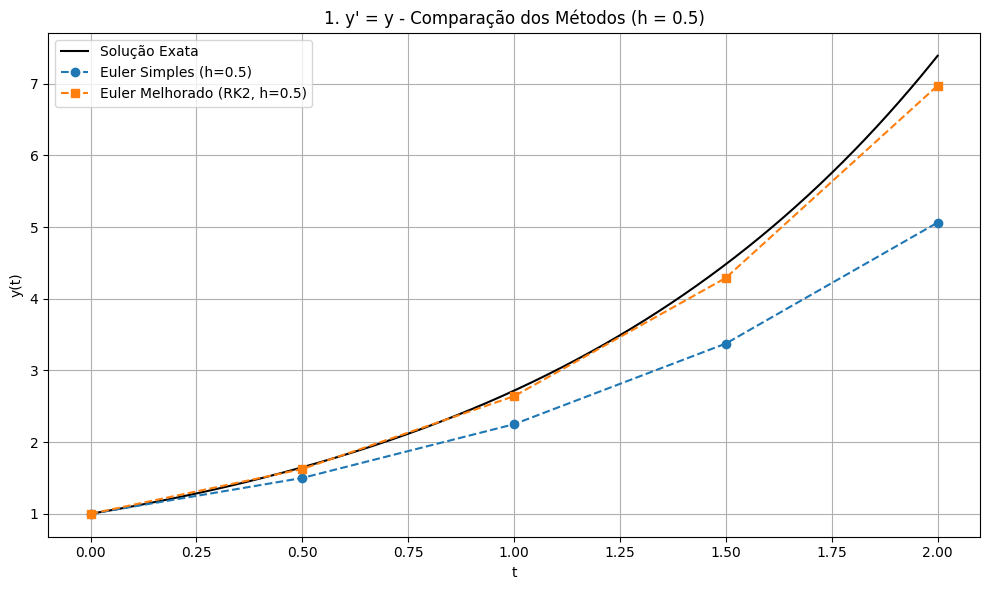

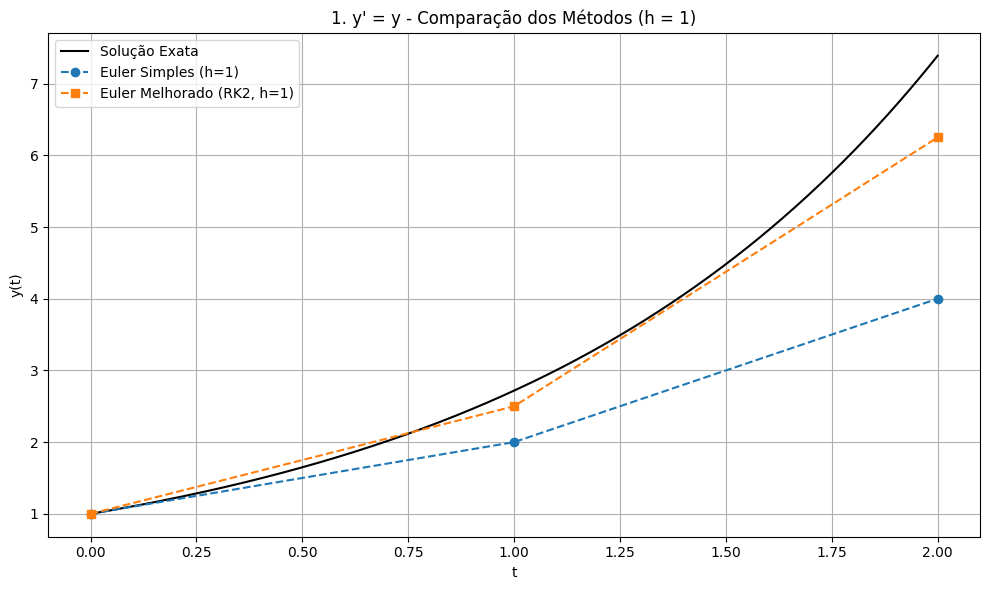

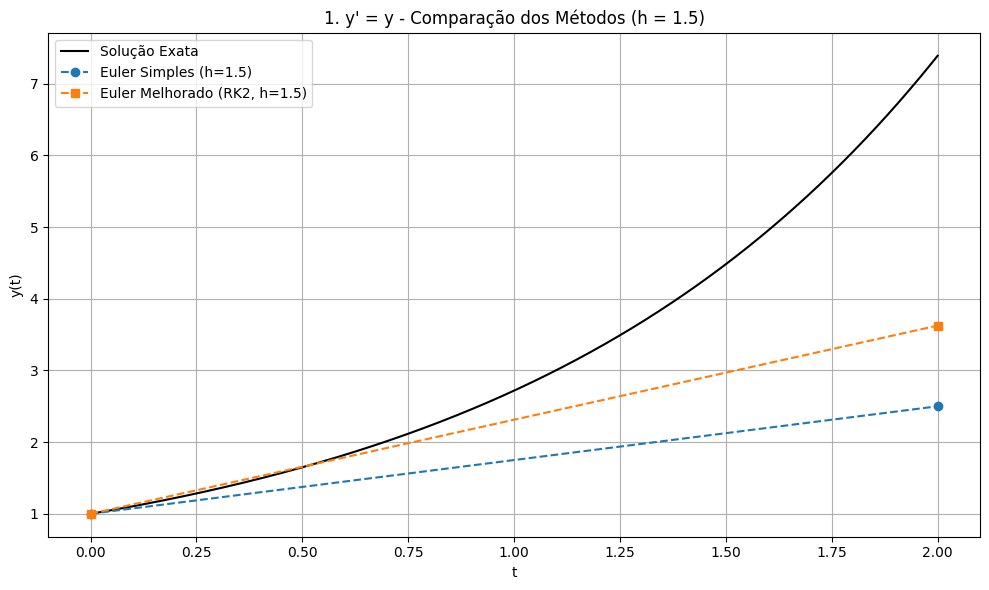

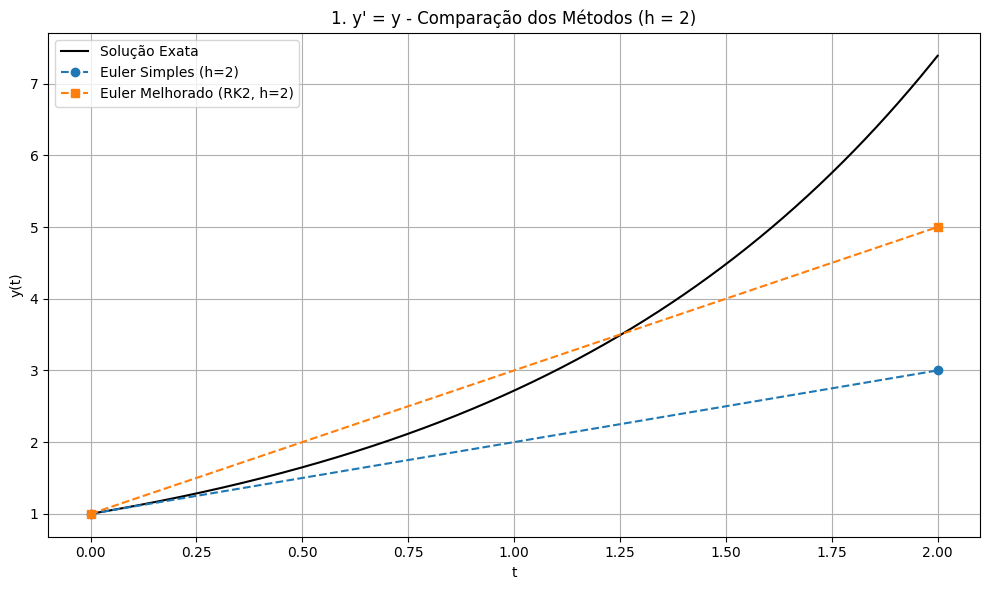

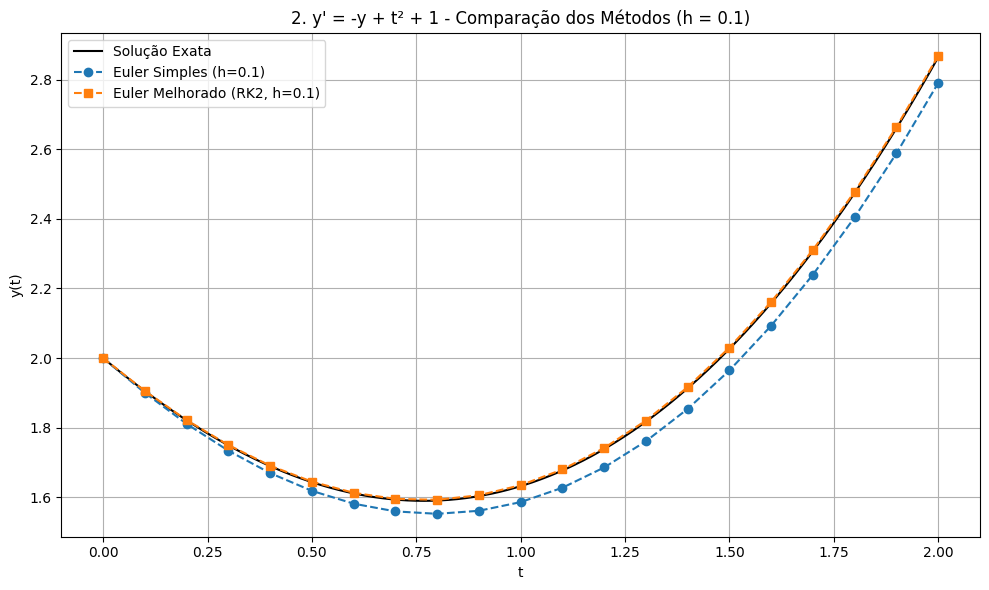

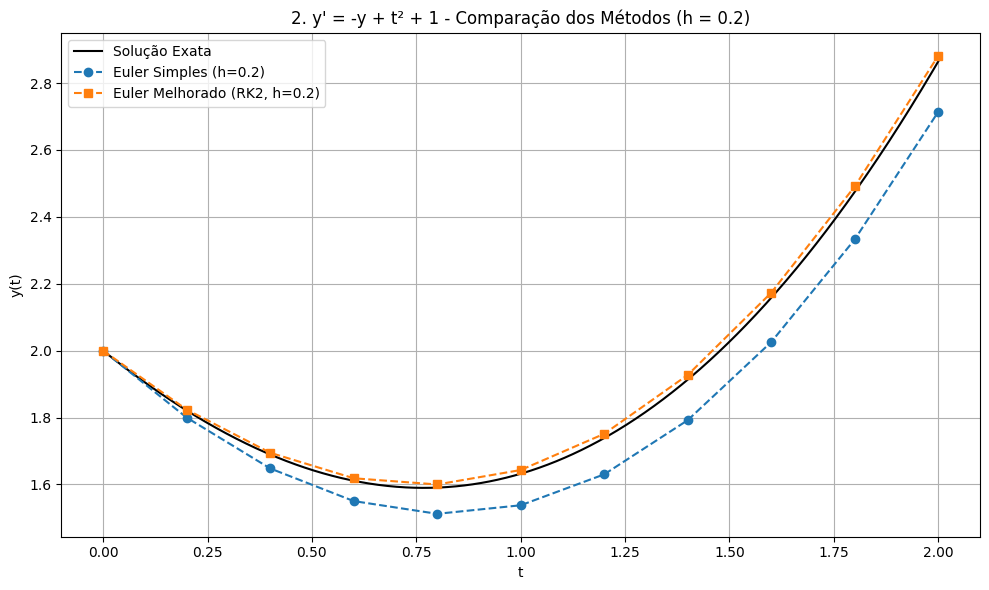

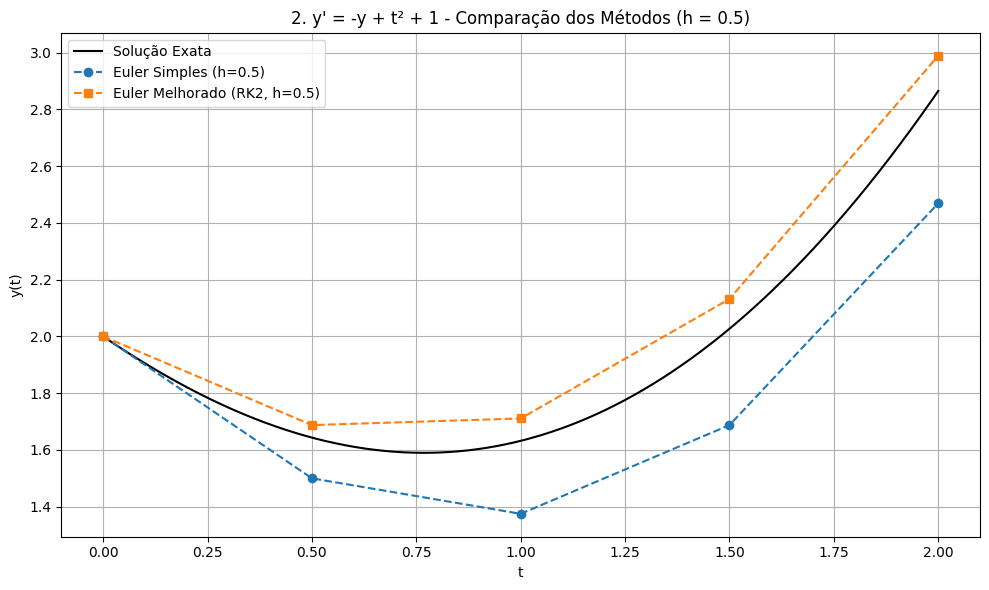

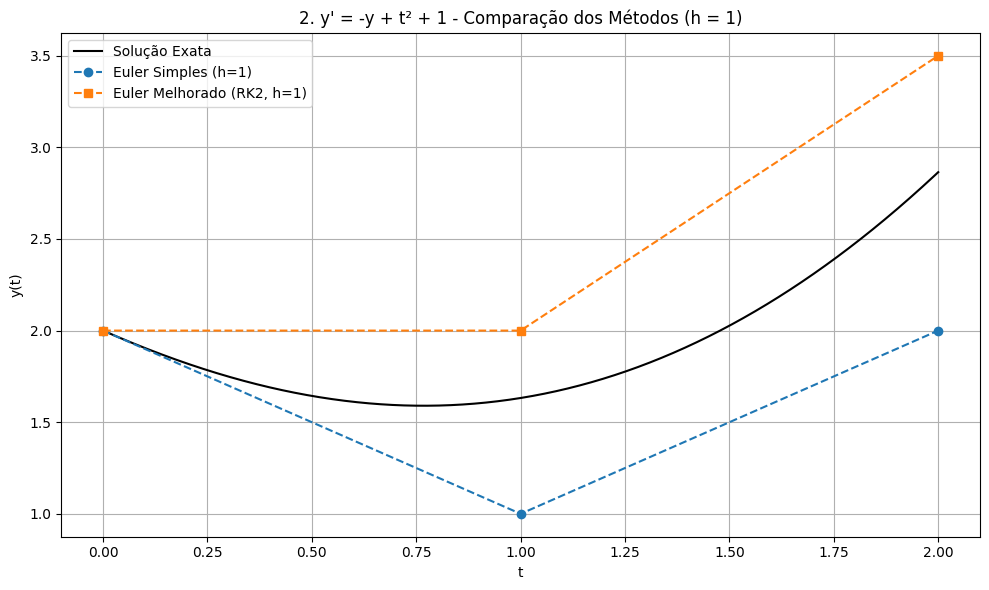

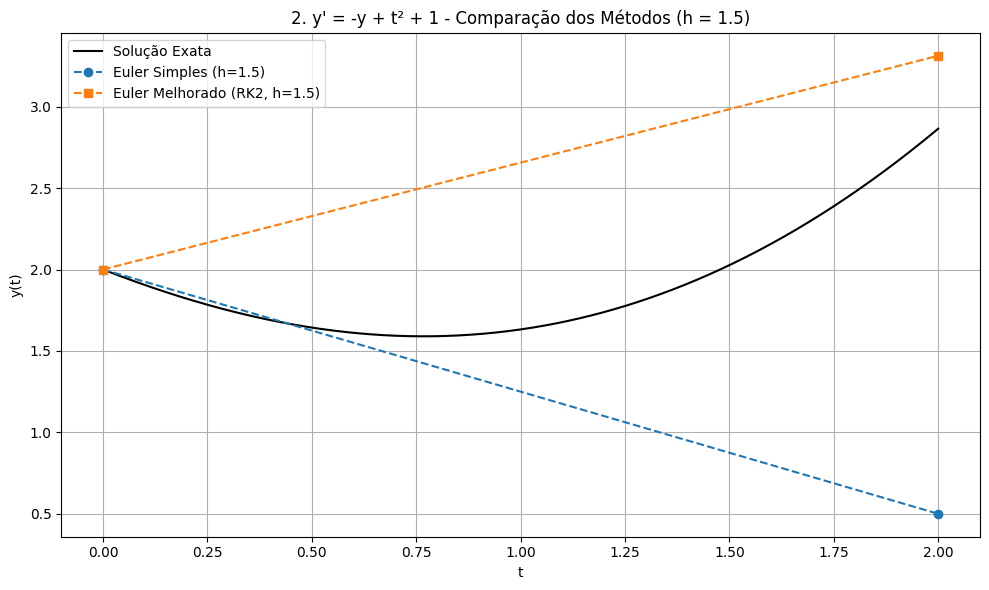

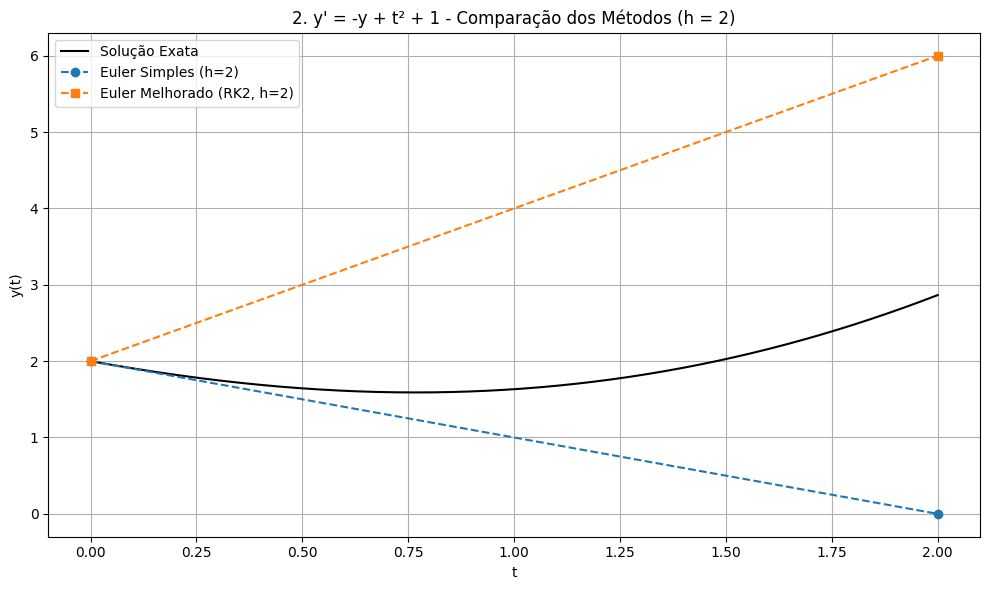

In [ ]:
# Comparação Euler Simples e Melhorado
def comparar_metodos(f, y_exata, y0, t0, tf, hs, titulo):
    t_exato = np.linspace(t0, tf, 1000)
    y_exato_vals = y_exata(t_exato)

    for h in hs:
        t_euler, y_euler = euler(f, y0, t0, tf, h)
        t_rk2, y_rk2 = euler_melhorado(f, y0, t0, tf, h)

        plt.figure(figsize=(10, 6))
        plt.plot(t_exato, y_exato_vals, 'k-', label='Solução Exata')
        plt.plot(t_euler, y_euler, 'o--', label=f'Euler Simples (h={h})')
        plt.plot(t_rk2, y_rk2, 's--', label=f'Euler Melhorado (RK2, h={h})')

        plt.title(f"{titulo} - Comparação dos Métodos (h = {h})")
        plt.xlabel("t")
        plt.ylabel("y(t)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Executar comparação para os dois PVIs
comparar_metodos(f1, y_exact1, y0=1, t0=0, tf=2, hs=[0.1, 0.2, 0.5, 1, 1.5, 2], titulo="1. y' = y")
comparar_metodos(f2, y_exact2, y0=2, t0=0, tf=2, hs=[0.1, 0.2, 0.5, 1, 1.5, 2], titulo="2. y' = -y + t² + 1")


# Sistema Presa predador (simula o equilíbrio entre essas duas espécies ao longo de várias iterações).


*   Utilizando Euler para solucionar EDOs
*   Resolvendo um dos exemplos dados
*   Aplicando a um caso real



Abaixo podem ser encontrados dois códigos diferentes da modelagem do problema. A primeira identificamos erros ao tentar aplica-lo ao modelo do pdf, mas o mantivemos no trabalho final para exemplificar a lógica utilizada. O segundo código está funcional e peço que seja considerado.


100%|██████████| 100000/100000 [00:00<00:00, 1539476.60it/s]


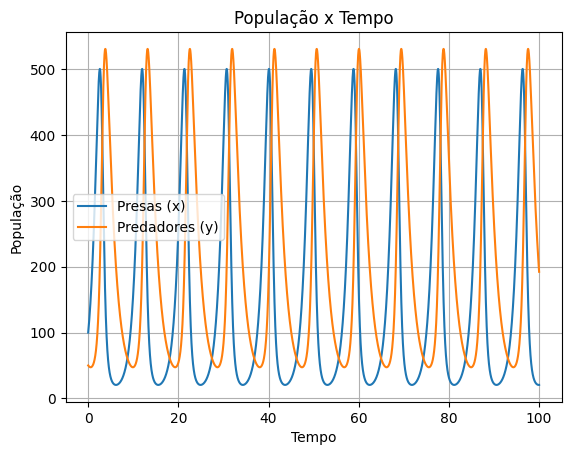

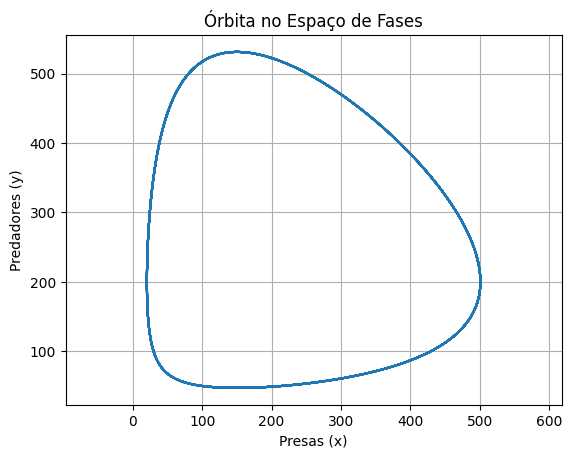

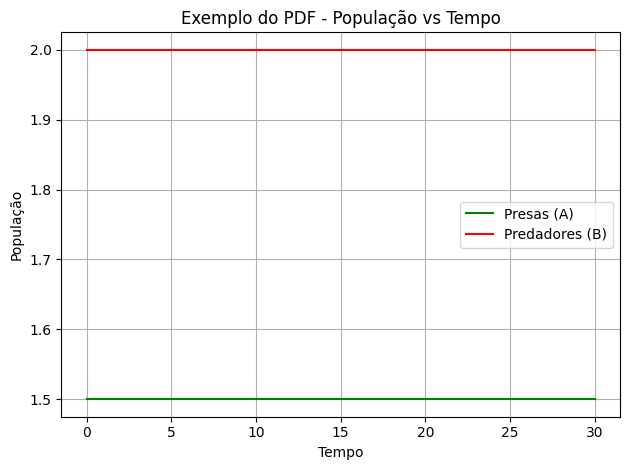

\nPonto de equilíbrio analítico:
x* = 150.00 (presas), y* = 200.00 (predadores)


100%|██████████| 100000/100000 [00:00<00:00, 1391090.24it/s]


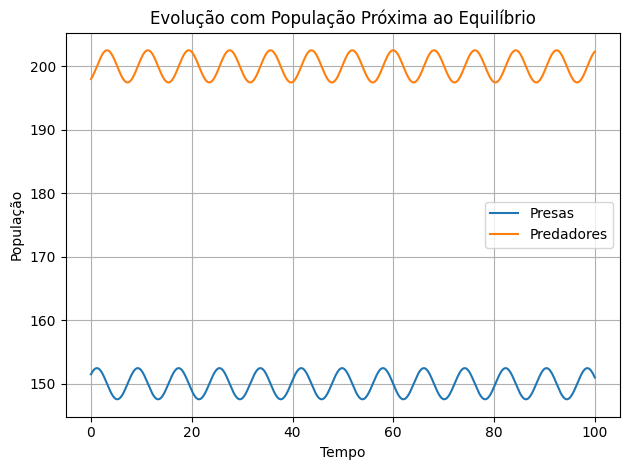

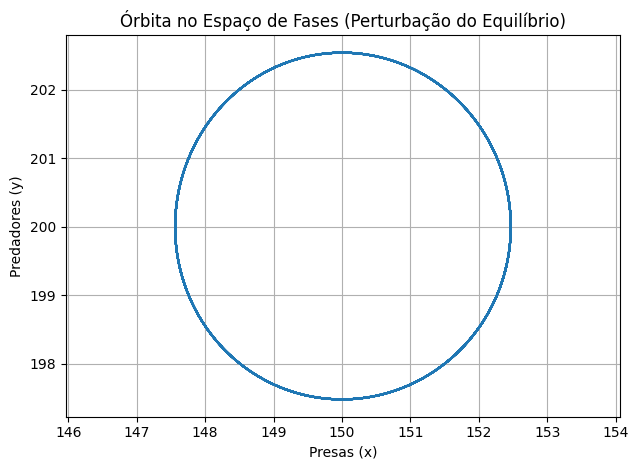

In [ ]:
# MODELO PRESA-PREDADOR (incorreto)

# EDOs
def dxdt(x, y, b, h, epsilon, d):
    return b * x - h * x * y

def dydt(x, y, b, h, epsilon, d):
    return epsilon * h * x * y - d * y

def predador_presa(x0, y0, b, h, epsilon, d, delta_t, max_t):

  # ⚠️nessa tentativa inicial não garantimos que a população de predadores seja menor do que de presas (verificamos esse erro na primeira vez que tentamos modelar o problema, mas a lógica dita que não teremos um sistema em equilibrio se a quantidade de predadores for maior do que a de presas). Então corrigimos a lógica na proxima tentativa
    x, y, t = x0, y0, 0
    t_list, x_list, y_list = [t], [x], [y]
    for _ in tqdm(range(int(max_t / delta_t))):
        x += dxdt(x, y, b, h, epsilon, d) * delta_t
        y += dydt(x, y, b, h, epsilon, d) * delta_t
        t += delta_t
        t_list.append(t)
        x_list.append(x)
        y_list.append(y)
    return t_list, x_list, y_list


# Parâmetros
b = 1.0
h_ = 0.005
epsilon = 0.8
d = 0.6
x0, y0 = 100, 50
delta_t = 0.001
max_t = 100


delta_t = 0.001
max_t = 100
t_sim, x_sim, y_sim = predador_presa(x0, y0, b, h_, epsilon, d, delta_t, max_t)

# Gráfico da evolução temporal
plt.plot(t_sim, x_sim, label="Presas (x)")
plt.plot(t_sim, y_sim, label="Predadores (y)")
plt.title("População x Tempo")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.legend()
plt.grid()
plt.show()

# Gráfico de órbita
plt.plot(x_sim, y_sim)
plt.title("Órbita no Espaço de Fases")
plt.xlabel("Presas (x)")
plt.ylabel("Predadores (y)")
plt.grid()
plt.axis('equal')
plt.show()
# exemplo

# Modelo com notação do PDF: A = presas, B = predadores
def modelo_pdf(t, U, k, gamma, rho, alpha, sigma):
    A, B = U
    dA = k * A - gamma * A**2 - rho * A * B
    dB = -alpha * B + sigma * A * B
    return [dA, dB]

# Método de Euler para sistemas
def euler_sistema(F, U0, t0, tf, h):
    n = int((tf - t0) / h)
    t = np.linspace(t0, tf, n + 1)
    U = np.zeros((n + 1, len(U0)))
    U[0] = U0
    for i in range(n):
        dU = F(t[i], U[i])
        U[i + 1] = U[i] + h * np.array(dU)
    return t, U

# Parâmetros do exemplo do PDF (γ = 0)
k = 1.0
gamma = 0.0
rho = 0.5
alpha = 0.75
sigma = 0.5

# Condições iniciais do exemplo
U0 = [1.5, 2]  # A = presas, B = predadores
t0, tf, h = 0, 30, 0.1

# Função com os parâmetros fixos
def F_pdf(t, U):
    return modelo_pdf(t, U, k, gamma, rho, alpha, sigma)

# simulação do exemplo
t1, U1 = euler_sistema(F_pdf, U0, t0, tf, h)

# Gráfico do exemplo do PDF
plt.plot(t1, U1[:, 0], label="Presas (A)", color='green')
plt.plot(t1, U1[:, 1], label="Predadores (B)", color='red')
plt.title("Exemplo do PDF - População vs Tempo")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Modelo complementar do sistema presa-predador (nos baseamos em material complementar encontrado na internet para melhor compreensão do sistema)
def dxdt(x, y, b, h, epsilon, d):
    return b * x - h * x * y

def dydt(x, y, b, h, epsilon, d):
    return epsilon * h * x * y - d * y

def predador_presa(x0, y0, b, h, epsilon, d, delta_t, max_t):
    x, y, t = x0, y0, 0
    t_list, x_list, y_list = [t], [x], [y]
    for _ in tqdm(range(int(max_t / delta_t))):
        x += dxdt(x, y, b, h, epsilon, d) * delta_t
        y += dydt(x, y, b, h, epsilon, d) * delta_t
        t += delta_t
        t_list.append(t)
        x_list.append(x)
        y_list.append(y)
    return t_list, x_list, y_list

# Parâmetros do modelo complementar
b = 1.0
h_ = 0.005
epsilon = 0.8
d = 0.6
delta_t = 0.001
max_t = 100

# Cálculo do ponto de equilíbrio
x_star = d / (epsilon * h_)
y_star = b / h_
print("\\nPonto de equilíbrio analítico:")
print(f"x* = {x_star:.2f} (presas), y* = {y_star:.2f} (predadores)")

# Pequena perturbação para gerar dinâmica (evita gráfico constante)
x0 = x_star * 1.01
y0 = y_star * 0.99

# Simulação
teq, xeq, yeq = predador_presa(x0, y0, b, h_, epsilon, d, delta_t, max_t)

# Gráfico: evolução temporal
plt.plot(teq, xeq, label="Presas")
plt.plot(teq, yeq, label="Predadores")
plt.title("Evolução com População Próxima ao Equilíbrio")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico: órbita no espaço de fases
plt.plot(xeq, yeq)
plt.title("Órbita no Espaço de Fases (Perturbação do Equilíbrio)")
plt.xlabel("Presas (x)")
plt.ylabel("Predadores (y)")
plt.grid()
plt.axis('equal')
plt.tight_layout()
plt.show()

100%|██████████| 100000/100000 [00:00<00:00, 1386583.45it/s]


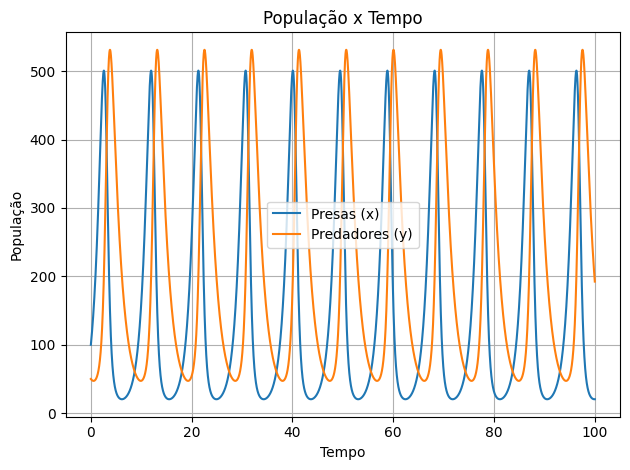

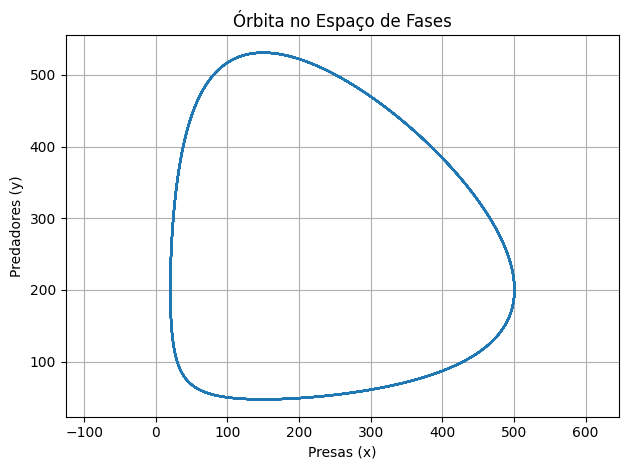

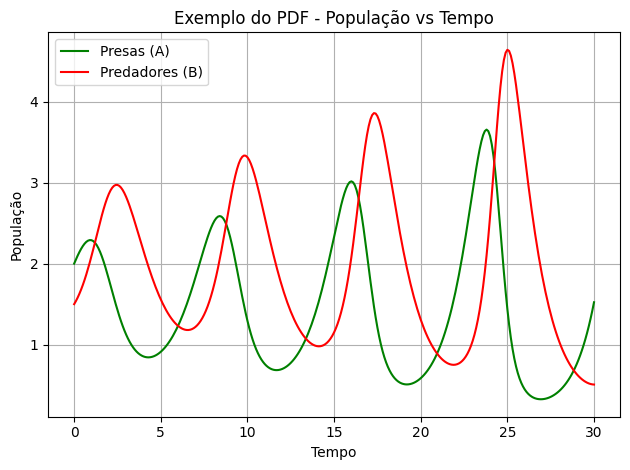

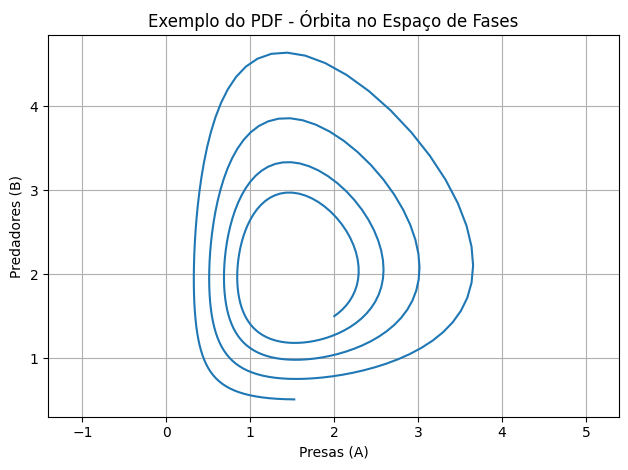

In [ ]:
# MODELO PRESA-PREDADOR (correto)

# EDOs
def dxdt(x, y, b, h, epsilon, d):
    return b * x - h * x * y

def dydt(x, y, b, h, epsilon, d):
    return epsilon * h * x * y - d * y

def predador_presa(x0, y0, b, h, epsilon, d, delta_t, max_t):
    if x0 < y0:
        print("⚠️ Atenção: população inicial de predadores está maior que a de presas.") #aviso acionado se a população de predadores for maior do que de presas
    x, y, t = x0, y0, 0
    t_list, x_list, y_list = [t], [x], [y]
    for _ in tqdm(range(int(max_t / delta_t))):
        x += dxdt(x, y, b, h, epsilon, d) * delta_t
        y += dydt(x, y, b, h, epsilon, d) * delta_t
        t += delta_t
        t_list.append(t)
        x_list.append(x)
        y_list.append(y)
    return t_list, x_list, y_list

# Parâmetros
b = 1.0
h_ = 0.005
epsilon = 0.8
d = 0.6
x0, y0 = 100, 50  # população inicial com mais presas que predadores
delta_t = 0.001
max_t = 100

# simulação
t_sim, x_sim, y_sim = predador_presa(x0, y0, b, h_, epsilon, d, delta_t, max_t)

# Gráfico da evolução temporal
plt.plot(t_sim, x_sim, label="Presas (x)")
plt.plot(t_sim, y_sim, label="Predadores (y)")
plt.title("População x Tempo")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Gráfico de órbita
plt.plot(x_sim, y_sim)
plt.title("Órbita no Espaço de Fases")
plt.xlabel("Presas (x)")
plt.ylabel("Predadores (y)")
plt.grid()
plt.axis('equal')
plt.tight_layout()
plt.show()


# exemplo

# Modelo com notação do PDF: A = presas, B = predadores
def modelo_pdf(t, U, k, gamma, rho, alpha, sigma):
    A, B = U
    dA = k * A - gamma * A**2 - rho * A * B
    dB = -alpha * B + sigma * A * B
    return [dA, dB]

# Método de Euler para sistemas
def euler_sistema(F, U0, t0, tf, h):
    n = int((tf - t0) / h)
    t = np.linspace(t0, tf, n + 1)
    U = np.zeros((n + 1, len(U0)))
    U[0] = U0
    for i in range(n):
        dU = F(t[i], U[i])
        U[i + 1] = U[i] + h * np.array(dU)
    return t, U

# Parâmetros do exemplo do PDF (γ = 0)
k = 1.0
gamma = 0.0
rho = 0.5
alpha = 0.75
sigma = 0.5

# Condições iniciais do exemplo - com mais presas que predadores
U0 = [2.0, 1.5]  # A = presas, B = predadores
t0, tf, h = 0, 30, 0.1

# Função com os parâmetros fixos
def F_pdf(t, U):
    return modelo_pdf(t, U, k, gamma, rho, alpha, sigma)

# simulação do exemplo
t1, U1 = euler_sistema(F_pdf, U0, t0, tf, h)

# Gráfico do exemplo do PDF
plt.plot(t1, U1[:, 0], label="Presas (A)", color='green')
plt.plot(t1, U1[:, 1], label="Predadores (B)", color='red')
plt.title("Exemplo do PDF - População vs Tempo")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico do espaço de fases (exemplo do PDF)
plt.plot(U1[:, 0], U1[:, 1])
plt.title("Exemplo do PDF - Órbita no Espaço de Fases")
plt.xlabel("Presas (A)")
plt.ylabel("Predadores (B)")
plt.grid()
plt.axis('equal')
plt.tight_layout()
plt.show()


# Caso Real - a série temporal das populações de lebres e linces registrados pela Hudson’s Bay Company entre 1845 e 1935, com base no número de peles caçadas.

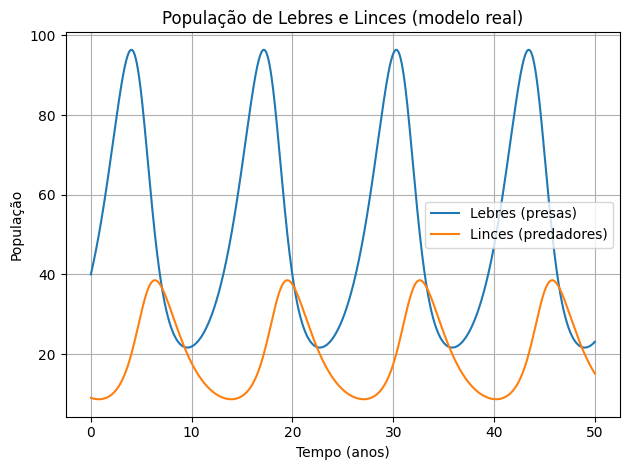

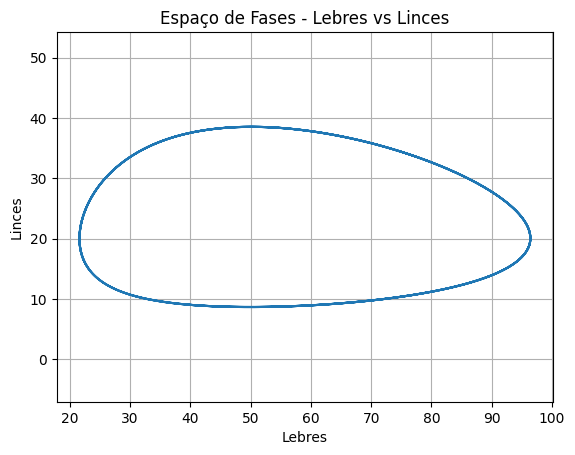

In [ ]:

def dxdt_real(x, y): return 0.5 * x - 0.025 * x * y
def dydt_real(x, y): return -0.5 * y + 0.01 * x * y

def presa_predador_real(x0, y0, delta_t, max_t):
    x, y, t = x0, y0, 0
    t_list, x_list, y_list = [t], [x], [y]
    for _ in range(int(max_t / delta_t)):
        x += dxdt_real(x, y) * delta_t
        y += dydt_real(x, y) * delta_t
        t += delta_t
        t_list.append(t)
        x_list.append(x)
        y_list.append(y)
    return t_list, x_list, y_list

x0_real = 40
y0_real = 9
t_real, x_real, y_real = presa_predador_real(x0_real, y0_real, 0.01, 50)

plt.plot(t_real, x_real, label="Lebres (presas)")
plt.plot(t_real, y_real, label="Linces (predadores)")
plt.title("População de Lebres e Linces (modelo real)")
plt.xlabel("Tempo (anos)"); plt.ylabel("População")
plt.grid(); plt.legend(); plt.tight_layout(); plt.show()

plt.plot(x_real, y_real)
plt.title("Espaço de Fases - Lebres vs Linces")
plt.xlabel("Lebres"); plt.ylabel("Linces")
plt.grid(); plt.axis('equal'); plt.show()
